In [37]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '../src')

from hamiltonian import *
from misc import *
from haldane_pseudopotential import *

In [38]:
#simulation parameters
#for MR_Pf state, v=5/2 and S=3
#N_phi=2(N_e)-3 for LL=2
N = 6
filling_factor_inv = 3
top_shift=3
Nphi = filling_factor_inv*N-top_shift

print('N_phi=',Nphi, 'flux quanta for N_e=',N,'electrons')

N_phi= 15 flux quanta for N_e= 6 electrons


In [39]:
#initialization (system configurations and parameters)
system = system(N, Nphi,0,L2=True)
#print(system.Q)
#print(system.L2.A)


========Initializing possible states in spherical geometry========
completed in 0.02862691879272461 seconds
N = 6 electrons
Nphi = 15 flux quanta

========Constructing total angular momentum matrix========
completed in 0.2389521598815918 seconds


In [40]:
#trial pseudopotential according to Greiter et al
trial_pp=np.array([1,1,0,0])
trial_pp=np.append(trial_pp, np.zeros((Nphi+1)-len(trial_pp)))
trial_pp = haldane_pseudopotential(system.Q, LLn = 0,custom=trial_pp)

#Coulomb pseudopotentials
pp = haldane_pseudopotential(system.Q, LLn = 0)

========Initializing interaction matrix========
Working on interaction matrix: 0.0 %
Working on interaction matrix: 6.25 %
Working on interaction matrix: 12.5 %
Working on interaction matrix: 18.75 %
Working on interaction matrix: 25.0 %
Working on interaction matrix: 31.25 %
Working on interaction matrix: 37.5 %
Working on interaction matrix: 43.75 %
Working on interaction matrix: 50.0 %
Working on interaction matrix: 56.25 %
Working on interaction matrix: 62.5 %
Working on interaction matrix: 68.75 %
Working on interaction matrix: 75.0 %
Working on interaction matrix: 81.25 %
Working on interaction matrix: 87.5 %
Working on interaction matrix: 93.75 %
completed in  25.74385118484497 seconds

========Initializing two-body pseudopotential========
completed in 0.1649942398071289 seconds
pseudopotential: [0.94077784 0.47810022 0.36465271 0.30920844 0.27547661 0.25260685
 0.2360966  0.22370669 0.21418726 0.20678325 0.20101256 0.19655552
 0.19319559 0.19078567 0.18922823 0.18846368]

=====

Text(0.5, 1.0, 'Haldane Pseudopotentials')

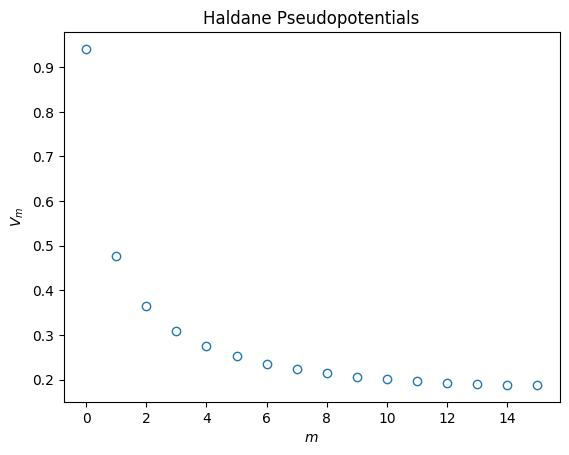

In [41]:
ax=plt.plot(pp.m, pp.V, ls="none", marker="o", mfc="none", label="$n=0$")
#ax=plt.plot(pp1.m, pp1.V, ls="none", marker="o", mfc="none", label="$trial$")
#ax=plt.plot(pp1.m, pp1.V, ls="none", marker="o", mfc="none", label="$trial$")
plt.xlabel('$m$')
plt.ylabel('$V_m$')
plt.title('Haldane Pseudopotentials')


In [54]:
#create hamiltonian and diagonalize coulomb interaction
hamiltonian = spherical_system(system, pp.pp_matrix)
hamil=hamiltonian.h.A
energies, eigenstates=LA.eigh(hamil)

L2=system.L2.A
L,ene=L_spectrum(L2,hamil)
print('Energy spectrum:', L)

========Constructing Hamiltonian of size 338 x 338 ========
Working on interaction matrix: 0.0 %
Working on interaction matrix: 5.029585798816568 %
Working on interaction matrix: 10.059171597633137 %
Working on interaction matrix: 15.088757396449704 %
Working on interaction matrix: 20.118343195266274 %
Working on interaction matrix: 25.14792899408284 %
Working on interaction matrix: 30.17751479289941 %
Working on interaction matrix: 35.20710059171598 %
Working on interaction matrix: 40.23668639053255 %
Working on interaction matrix: 45.26627218934911 %
Working on interaction matrix: 50.29585798816568 %
Working on interaction matrix: 55.325443786982255 %
Working on interaction matrix: 60.35502958579882 %
Working on interaction matrix: 65.38461538461539 %
Working on interaction matrix: 70.41420118343196 %
Working on interaction matrix: 75.44378698224851 %
Working on interaction matrix: 80.4733727810651 %
Working on interaction matrix: 85.50295857988166 %
Working on interaction matrix: 90

Text(0, 0.5, '$E$')

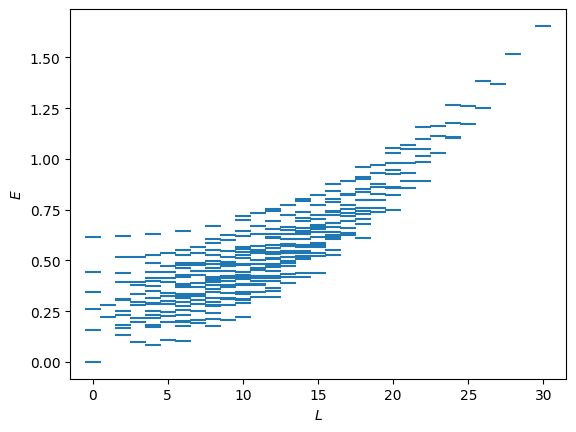

In [55]:
#plotting energetics

fig, ax = plt.subplots()
ax=plt.plot(L, ene, ls="none", marker="_", ms="12", mew="1.5")
#plt.title('Energetics of N=8 particles, $N_{\phi}$=21')

plt.xlabel('$L$')
plt.ylabel('$E$')

#plt.savefig('energectics_n8_nphi_21.png')

Text(0, 0.5, '$E$')

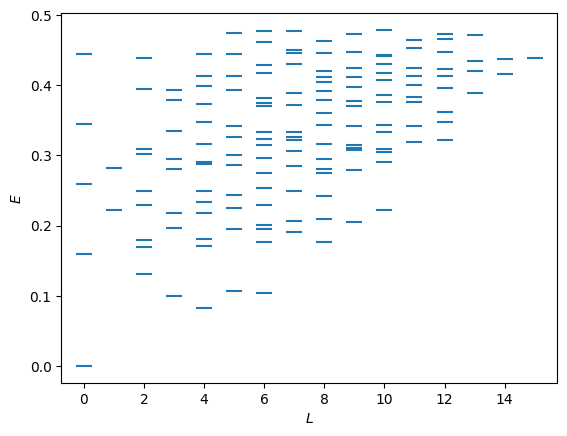

In [56]:
ind=np.argsort(ene) #ensure lowest energy eigenstates are selected

sorted_L=L[ind]
sorted_ene=ene[ind]
if len(ene)>=100: 
    sorted_L=sorted_L[:150]
    sorted_ene=sorted_ene[:150]
    
#plotting energetics
fig, ax = plt.subplots()
ax=plt.plot(sorted_L, sorted_ene, ls="none", marker="_", ms="12", mew="1.5")
#plt.title('Energetics of N=8 particles, $N_{\phi}$=21')

plt.xlabel('$L$')
plt.ylabel('$E$')

In [ ]:
trial_hamiltonian = spherical_system(system, trial_pp.pp_matrix)
trial_hamil=trial_hamiltonian.h.A
trial_energies, trial_eigenstates=LA.eigh(trial_hamil)

L2=system.L2.A
L,ene=L_spectrum(L2,trial_hamil)
print('Energy spectrum:', L)

========Constructing Hamiltonian of size 18 x 18 ========
Working on interaction matrix: 0.0 %
Working on interaction matrix: 5.555555555555555 %
Working on interaction matrix: 11.11111111111111 %
Working on interaction matrix: 16.666666666666664 %
Working on interaction matrix: 22.22222222222222 %
Working on interaction matrix: 27.77777777777778 %
Working on interaction matrix: 33.33333333333333 %
Working on interaction matrix: 38.88888888888889 %
Working on interaction matrix: 44.44444444444444 %
Working on interaction matrix: 50.0 %
Working on interaction matrix: 55.55555555555556 %
Working on interaction matrix: 61.111111111111114 %
Working on interaction matrix: 66.66666666666666 %
Working on interaction matrix: 72.22222222222221 %
Working on interaction matrix: 77.77777777777779 %
Working on interaction matrix: 83.33333333333334 %
Working on interaction matrix: 88.88888888888889 %
Working on interaction matrix: 94.44444444444444 %
completed in 0.013548135757446289 seconds
Energy 

Text(0, 0.5, '$E$')

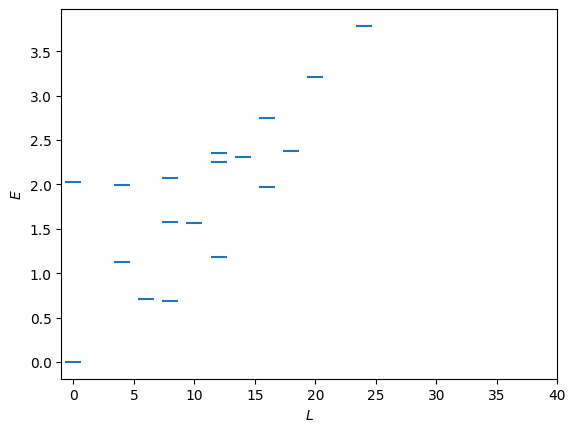

In [ ]:
#plotting energetics

fig, ax = plt.subplots()
ax=plt.plot(2*L, ene, ls="none", marker="_", ms="12", mew="1.5")
plt.xlim(-1, 40)

#plt.title('Energetics of N=8 particles, $N_{\phi}$=21')

plt.xlabel('$L$')
plt.ylabel('$E$')

#plt.savefig('energectics_n8_nphi_21.png')

In [ ]:
overlap_Vectors(np.transpose(trial_eigenstates)[0],np.transpose(eigenstates)[0])

overlap of wavefunciton <Ψtrial|Ψexact>= 0.9980393413833781


0.9980393413833781

In [8]:
ene

NameError: name 'ene' is not defined